In [ ]:
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('/content/image1.jpeg')   # replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nn.jpg to nn (1).jpg


In [ ]:
#load an image.
img=cv2.imread('nn.jpg')

In [ ]:
#Convert the image to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

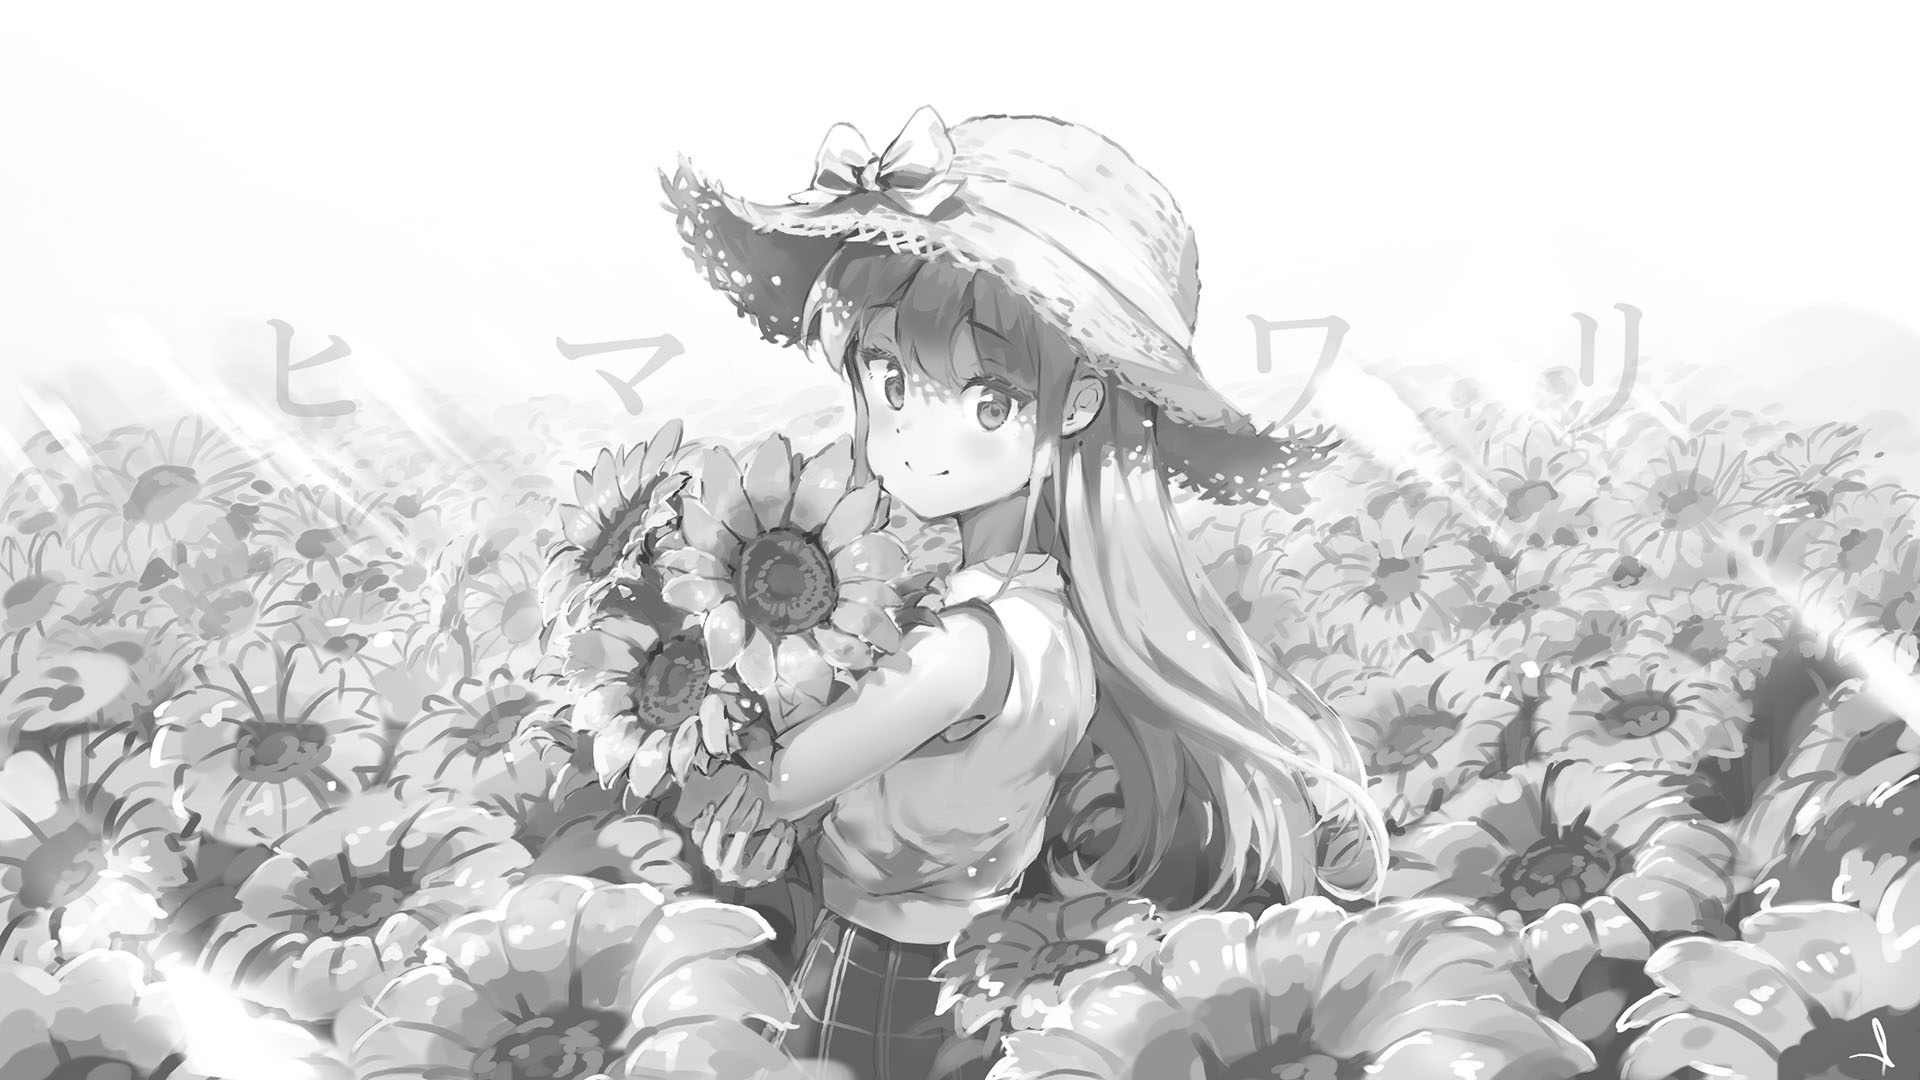

In [ ]:
cv2_imshow(gray)

In [ ]:
#Apply the Harris corner detection algorithm.
dst = cv2.cornerHarris(gray, 2, 5, 0.07)

In [ ]:
#Dilate the result to mark the corners more clearly
dst = cv2.dilate(dst, None)

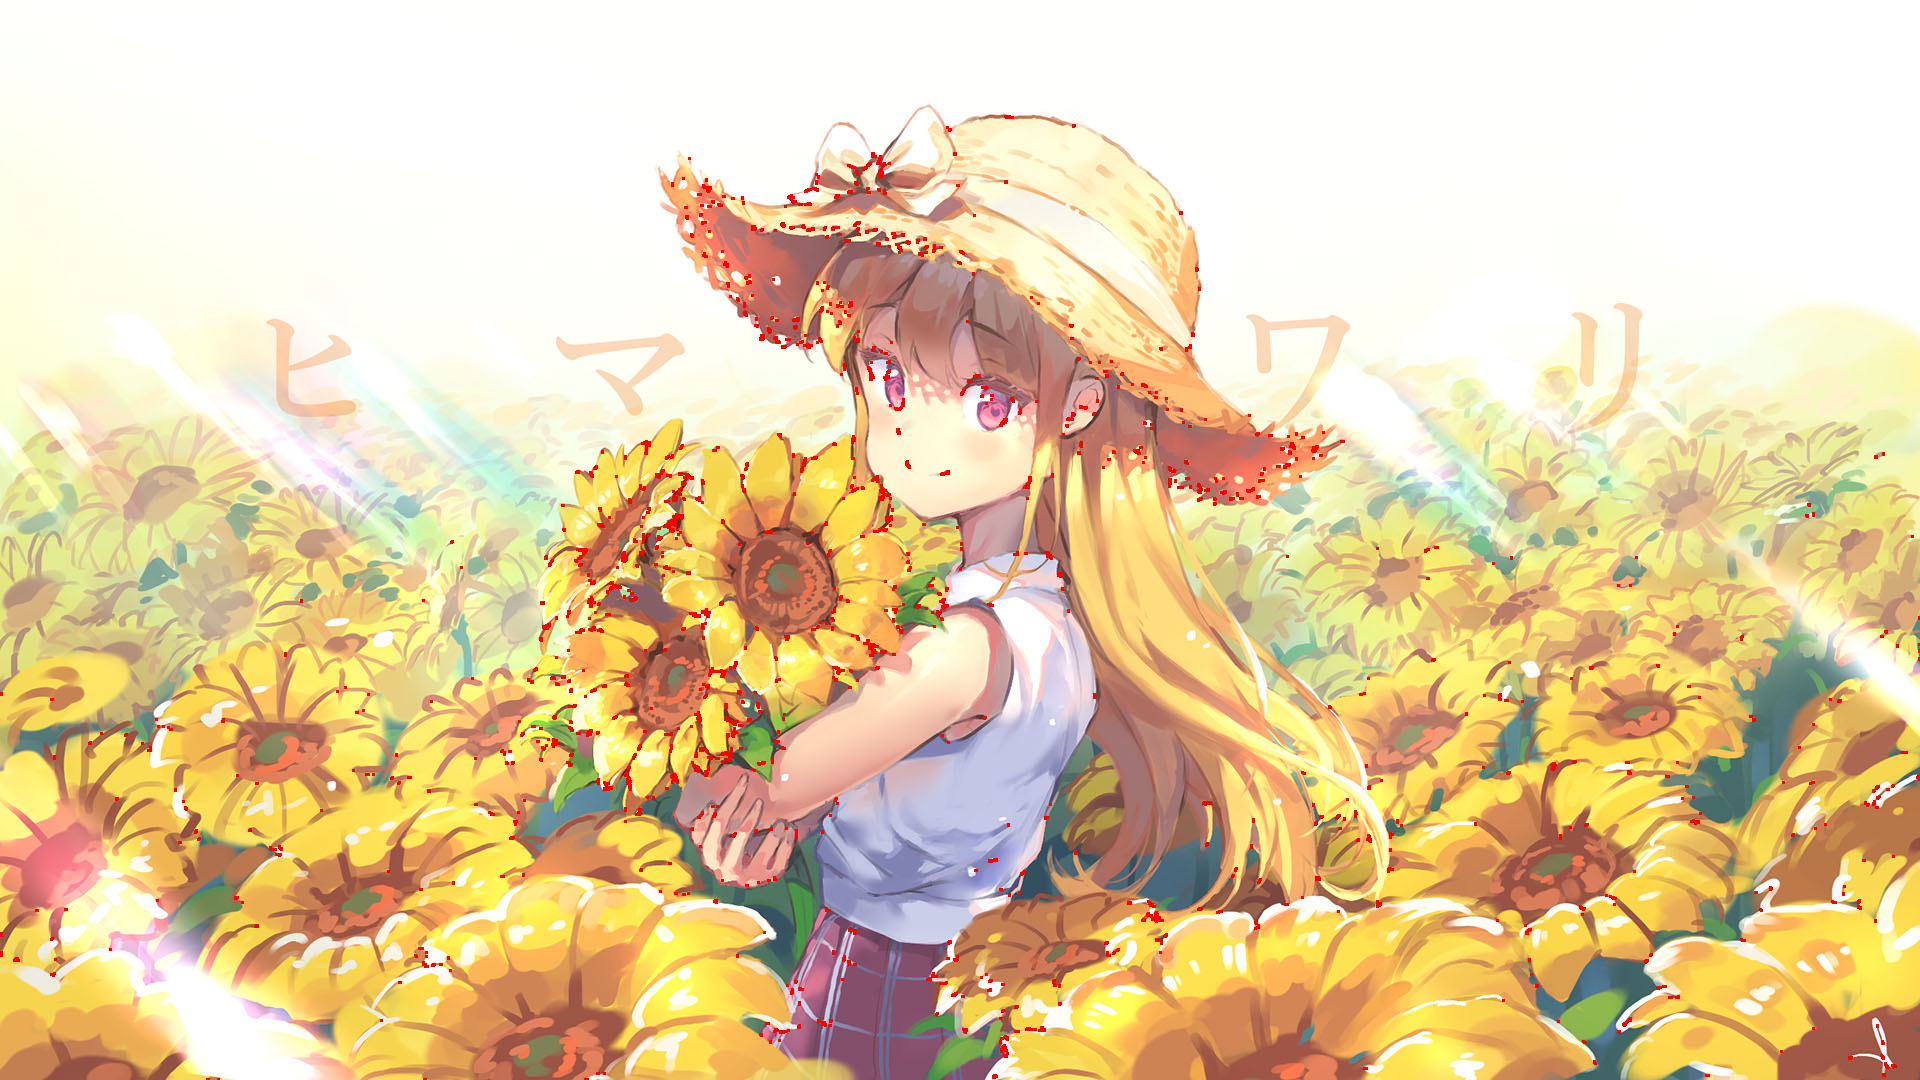

In [ ]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]

#display img
cv2_imshow( img)

In [ ]:

pip install opencv-python opencv-python-headless opencv-contrib-python


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints_sift, descriptors_sift = sift.detectAndCompute(gray, None)

# Draw keypoints
image_sift = cv2.drawKeypoints(img, keypoints_sift, None)

# Display SIFT keypoints
plt.figure(figsize=(10, 10))
plt.title("SIFT Keypoints")
plt.imshow(image_sift)
plt.show()


In [ ]:
# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints_surf, descriptors_surf = surf.detectAndCompute(gray, None)

# Draw keypoints
image_surf = cv2.drawKeypoints(img, keypoints_surf, None)

# Display SURF keypoints
plt.figure(figsize=(10, 10))
plt.title("SURF Keypoints")
plt.imshow(image_surf)
plt.show()


error: OpenCV(4.10.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


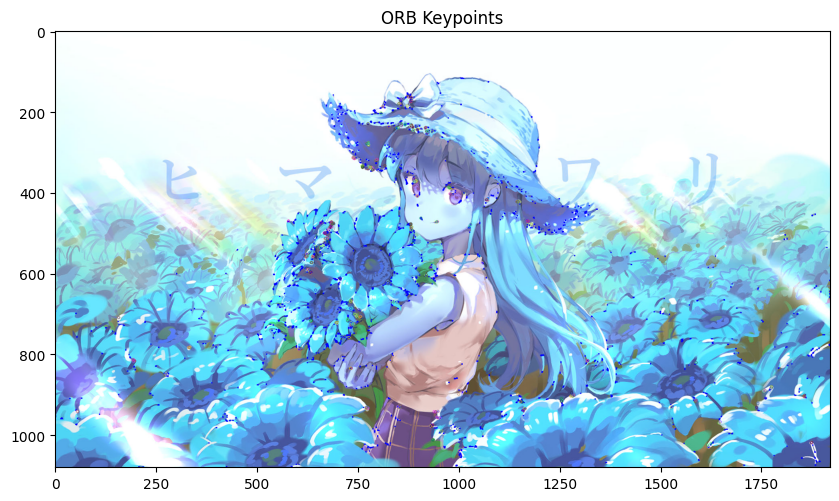

In [ ]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)

# Draw keypoints
image_orb = cv2.drawKeypoints(img, keypoints_orb, None)

# Display ORB keypoints
plt.figure(figsize=(10, 10))
plt.title("ORB Keypoints")
plt.imshow(image_orb)
plt.show()


In [ ]:
# Initialize HOG descriptor
hog = cv2.HOGDescriptor()

# Compute HOG features
hog_features = hog.compute(gray)

# Visualize HOG features (not directly but by using gradients)
def visualize_hog(img, hog_features, cell_size=8):
    hog_image = np.zeros(img.shape, dtype=np.float32)
    n_cells = (img.shape[0] // cell_size, img.shape[1] // cell_size)
    hog_features = hog_features.reshape(n_cells[1] - 1, n_cells[0] - 1, 8, 9)
    for x in range(n_cells[1] - 1):
        for y in range(n_cells[0] - 1):
            for o in range(9):
                center = (x * cell_size + cell_size // 2, y * cell_size + cell_size // 2)
                dx = cell_size * np.cos(o * np.pi / 9)
                dy = cell_size * np.sin(o * np.pi / 9)
                cv2.line(hog_image, center, (int(center[0] + dx), int(center[1] + dy)), 255, 1)

    return hog_image

hog_image = visualize_hog(gray, hog_features)

# Display HOG features
plt.figure(figsize=(10, 10))
plt.title("HOG Features")
plt.imshow(hog_image, cmap='gray')
plt.show()


ValueError: cannot reshape array of size 105688800 into shape (239,134,8,9)